### Multi-planet Mode

Estimate the intrinsic distribution of planetary systems by fitting a population of multi-planet systems to Kepler data

In [1]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt

initialize the EPOS class

In [2]:
epos= EPOS.epos(name='example_2')



 |~| epos 3.0.0.dev2 |~|


Using random seed 493439428


Read in the kepler dr25 exoplanets and survey efficiency packaged with EPOS

In [3]:
obs, survey= EPOS.kepler.dr25(Huber=True, Vetting=True, score=0.9)
epos.set_observation(**obs)
epos.set_survey(**survey)


Loading planets from temp/q1_q17_dr25_koi.npz
  6853/7995 dwarfs
  3525 candidates, 3328 false positives
  3040+1 with score > 0.90

Observations:
  159238 stars
  3041 planets

  1840 singles, 487 multis
  - single: 1840
  - double: 324
  - triple: 113
  - quad: 38
  - quint: 10
  - sext: 2


Define the function that describes the intrinsic planetary system population. Here we use a double broken power-law from EPOS.fitfunctions to deinfe the location and size of the innermost planet in each system.

In [4]:
epos.set_parametric(EPOS.fitfunctions.brokenpowerlaw2D)

brokenpowerlaw2D takes 8 parameters. 
The two dependent parameters are the period and radius. 
There are 6 free parameters (xp, p1, p2, yp, p3, p4) and a normalization parameter. 
Let's define them:

The normalization parameter, labeled pps, defines the fraction of stars with planetary systems.
Let's assign a planetary system to 40% of stars, and exclude negative numbers with the min keyword.

In [5]:
epos.fitpars.add('pps', 0.4, min=0, isnorm=True)

Initialize the 6 parameters that define the distribution of the innermost planets, fixing the radius distribution.

In [6]:
epos.fitpars.add('P break', 10., min=2, max=50, is2D=True)
epos.fitpars.add('a_P', 1.5, min=0, is2D=True)
epos.fitpars.add('b_P', -1, max=1, dx=0.1, is2D=True)
epos.fitpars.add('R break', 3.3, fixed=True, is2D=True) 
epos.fitpars.add('a_R', -0.5, fixed=True, is2D=True)
epos.fitpars.add('b_R', -6., fixed=True, is2D=True)

define the simulated range (trim) and the range compared to observations (zoom)

In [7]:
epos.set_ranges(xtrim=[0,730],ytrim=[0.3,20.],xzoom=[2,400],yzoom=[1,6], Occ=True)

Show the inner planet distribution

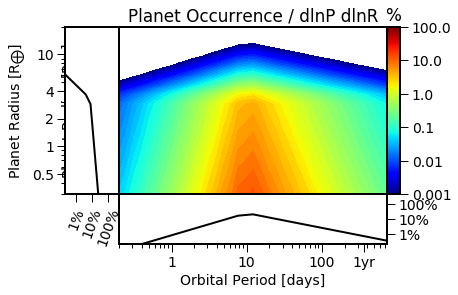

In [8]:
EPOS.plot.parametric.panels(epos, NB=True)

Define the locations of additional planets in the system. Here, let's use 10 planets per system, with the spacing drawn from a dimensionless distribution

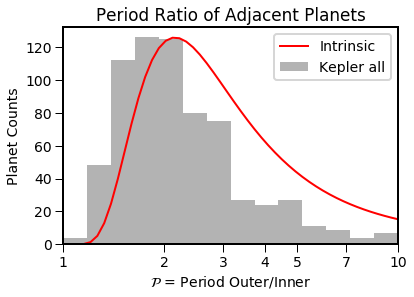

In [9]:
epos.set_multi(spacing='dimensionless')
epos.fitpars.add('npl', 10, fixed=True) # planets per system
epos.fitpars.add('log D', -0.3)
epos.fitpars.add('sigma', 0.2, min=0)
EPOS.plot.multi.periodratio(epos, Input=True, MC=False, NB=True)

Define the mutual inclinations, drawn from  Rayleigh distribution with mode 2 degrees

In [10]:
epos.fitpars.add('inc', 2.0)				# mode of mutual inclinations

Fraction of system with high mutual inclunations to fit the Kepler dichotomy

In [11]:
epos.fitpars.add('f_iso', 0.4)				# Fraction of isotropic systems

Add a dispersion to the radii of planets in each system

In [12]:
epos.fitpars.add('dR', 0.01, fixed=True)

Generate an observable planet population with the inital guess and compare it to Kepler

In [13]:
EPOS.run.once(epos)


Preparing EPOS run...
  6 fit parameters
  Set f_cor to default 0.5

Starting the first MC run
  63695/356370 systems
  Average mutual inc=2.4 degrees

  356370 planets, 9647 transit their star
  - single: 4632
  - double: 1082
  - triple: 456
  - quad: 217
  - quint: 81
  - sext: 24
  - sept: 6
  - oct: 3
  9647 transiting planets, 2145 detectable
  - single: 1263
  - double: 226
  - triple: 87
  - quad: 29
  - quint: 7
  - sext: 3

Goodness-of-fit
  logp= -160.4
  - p(n=1548)=1.9e-58
  - p(x)=3.5e-08
  - p(N_k)=0.84
  - p(P ratio)=0.027
  - p(P inner)=0.0014
  observation comparison in 0.044 sec
Finished one MC in 0.475 sec


Show the simulated detections

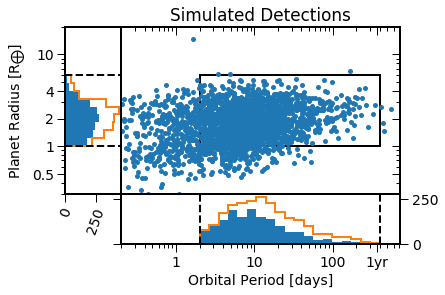

In [14]:
EPOS.plot.periodradius.panels(epos, NB=True)

And the detectable planet architectures, compared to the initial distributions

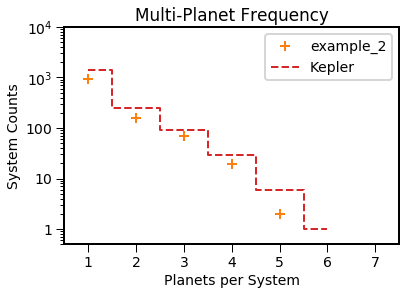

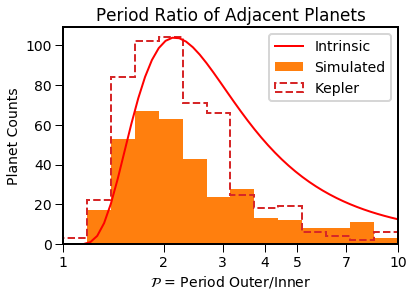

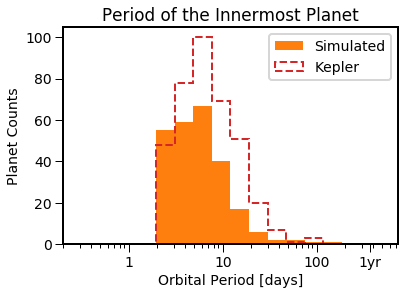

In [15]:
EPOS.plot.multi.multiplicity(epos, MC=True, NB=True)
EPOS.plot.multi.periodratio(epos, Input=True, MC=True, NB=True)
EPOS.plot.multi.periodinner(epos, MC=True, NB=True)

The simulated distributions are a bit different from what is observed. Let's minimize the distance between the distributions using emcee. (Note the counter doesn't work yet)

In [16]:
EPOS.run.mcmc(epos, nMC=100, nwalkers=20, nburn=20, threads= 8, Saved=True) # ~20 mins
#EPOS.run.mcmc(epos, nMC=500, nwalkers=50, nburn=200, threads= 8, Saved=True) # ~20 mins
#EPOS.run.mcmc(epos, nMC=1000, nwalkers=100, nburn=200, threads=20, Saved=True) # ~5 hrs


Loading saved status from chain/example_2/20x100x8.npz

NOTE: Random seed changed: 3119675631 to 493439428

MC-ing the 30 samples to plot
Mercury analogues < 3.3% +1.2% -1.1%
  1 sigma UL 3.9%
  2 sigma UL 5.1%
  3 sigma UL 12.2%
Venus analogues < 0.9% +0.4% -0.3%
  1 sigma UL 1.2%
  2 sigma UL 1.6%
  3 sigma UL 4.9%

Best-fit values
  pps= 0.57 +0.0583 -0.0365
  P break= 10.8 +1.87 -1.39
  a_P= 1.61 +0.246 -0.191
  b_P= -1.3 +0.171 -0.107
  log D= -0.345 +0.0311 -0.0343
  sigma= 0.187 +0.0225 -0.019
  inc= 1.92 +0.684 -0.67
  f_iso= 0.418 +0.0635 -0.0459

Starting the best-fit MC run
  90776/565953 systems
  Average mutual inc=2.3 degrees

  565953 planets, 14997 transit their star
  - single: 6926
  - double: 1572
  - triple: 783
  - quad: 353
  - quint: 133
  - sext: 52
  - sept: 20
  - oct: 5
  - nint: 1
  14997 transiting planets, 3087 detectable
  - single: 1743
  - double: 354
  - triple: 135
  - quad: 34
  - quint: 14
  - sext: 3
  - sept: 1

Goodness-of-fit
  logp= -13.7
  - 

Let's look at the posterior distributions

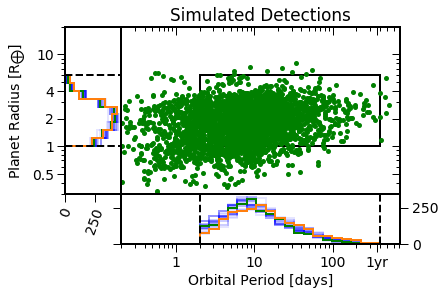

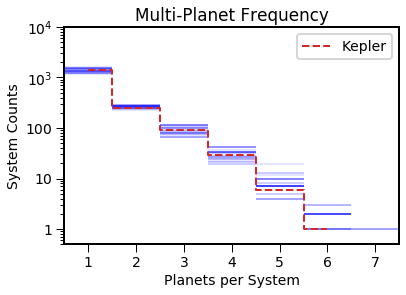

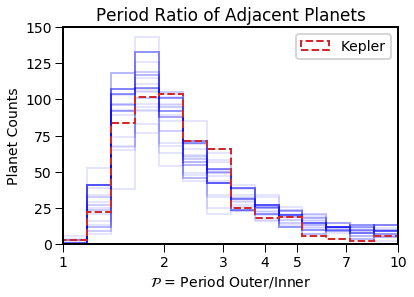

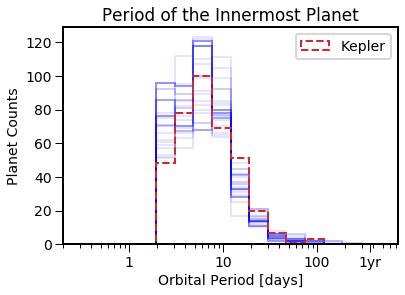

In [17]:
EPOS.plot.periodradius.panels(epos, MCMC=True, NB=True)
EPOS.plot.multi.multiplicity(epos, MCMC=True, MC=True, NB=True)
EPOS.plot.multi.periodratio(epos, MCMC=True, MC=True, NB=True)
EPOS.plot.multi.periodinner(epos, MCMC=True, MC=True, NB=True)

Save the planet populations to a csv file

In [18]:
popdict= dict(all_systems=epos.population, 
              transiting_systems= epos.population['system'],
             transiting_planets= epos.synthetic_survey)

for key, pop in popdict.items():
    fname= 'csv/'+epos.name+'_'+key
    EPOS.save.to_csv(fname, starID= pop['ID'], Period_days= pop['P'], Radius_earth= pop['Y'])